In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
eps = np.finfo(float).eps
tiny = 100*eps

** Initial Conditions **

In [2]:
N = 50

x0 = 1.
xf = 4.
def f(x):
    return x**3
def fp(x,y):
    return 3*y/x
def fpy(x,y):
    return 3/x

#x0 = 2.
#xf = 5.
#def f(x):
#    return x+1-np.exp(x-1)
#def fp(x,y):
#    return y-x
#def fpy(x,y):
#    return 1

f0 = f(x0)

*** MULTI LINEAR ***

** Forward Euler**

In [3]:
def forward_euler(x0,xf,f0,N,fp):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    for i in range(N):
        f0 += delta*fp(x0,f0)
        x0 += delta
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

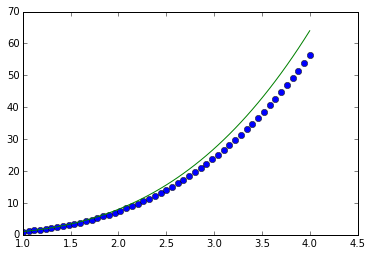

In [4]:
xs, eys = forward_euler(x0,xf,f0,N,fp)
plt.plot(xs,eys,'o',xs,f(xs))

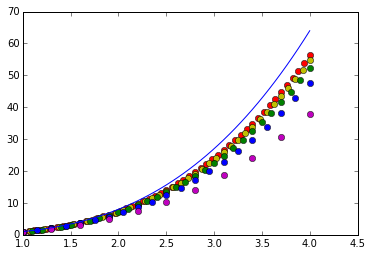

In [5]:
xs40, eys40 = forward_euler(x0,xf,f0,40,fp)
xs30, eys30 = forward_euler(x0,xf,f0,30,fp)
xs20, eys20 = forward_euler(x0,xf,f0,20,fp)
xs10, eys10 = forward_euler(x0,xf,f0,10,fp)
plt.plot(xs,eys,'ro',xs40,eys40,'yo',xs30,eys30,'go',xs20,eys20,'bo',xs10,eys10,'mo',xs,f(xs))

**Euler-System**

In [6]:
t0 = 0
tf = 3*np.pi
y0 = -1
v0 = -2
def yp(t,y,v):
    return v
def vp(t,y,v):
    return -y

In [7]:
def euler_sys(t0,tf,y0,v0,yp,vp,N):
    ts = [t0]
    ys = [y0]
    vs = [v0]
    delta = (tf - t0)/float(N)
    for i in range(N):
        y0temp = y0
        y0 += delta*yp(t0,y0,v0)
        v0 += delta*vp(t0,y0temp,v0)
        t0 += delta
        ts = np.append(ts,t0)
        ys = np.append(ys,y0)
        vs = np.append(vs,v0)
    return ts, ys, vs

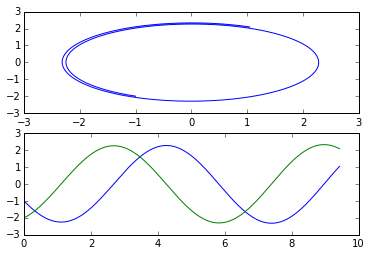

In [8]:
ts, ys, vs = euler_sys(t0,tf,y0,v0,yp,vp,1000)
fig, axarr = plt.subplots(2)
axarr[0].plot(ys,vs)
axarr[1].plot(ts,ys,ts,vs)

** Midpoint **

In [9]:
def midpoint(x0,xf,f0,N,fp):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    acc = 10                       #calculate starting value using Forward Euler
    xinit = x0
    yinit = f0
    small_delta = delta/acc
    for i in range(acc):
        yinit += small_delta*fp(x0,yinit)
        xinit += small_delta
    xs = np.append(xs,xinit)
    ys = np.append(ys,yinit)
    for i in range(N):
        f0 = ys[i] + 2*delta*fp(xs[i+1],ys[i+1])
        x0 += delta
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

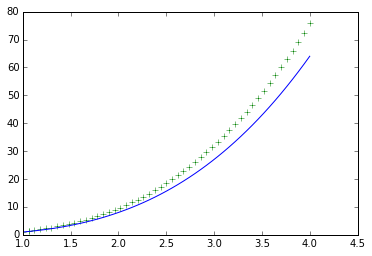

In [10]:
xs,mys = midpoint(x0,xf,f0,N,fp)
plt.plot(xs,mys,'g+',xs,f(xs))

** Backward Euler**

In [11]:
def backward_euler(x0,xf,f0,N,fp,fpy):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    for i in range(N):
        def root(guess):
            return guess - f0 - delta*fp(x0+delta,guess)
        def rootp(guess):
            return 1 - delta*fpy(x0+delta, guess)
        count = 1 
        guess = f0
        while np.abs(root(guess)) > tiny:                           # Newton's Method
            guess = guess - root(guess)/rootp(guess)
            count += 1
            if np.abs(rootp(f0)) < tiny:
                print 'Derivative is vanishing'
                break
            if count == 100:
                print 'does not converge'
                break
        f0 = guess
        x0 += delta
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

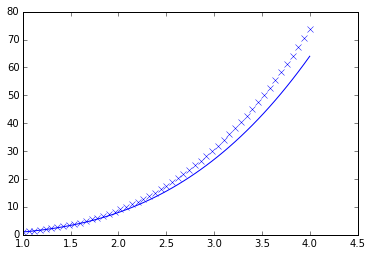

In [12]:
xs, beys = backward_euler(x0,xf,f0,N,fp,fpy)
plt.plot(xs,beys,'bx',xs,f(xs))

** Trapezoid **

In [13]:
def trapezoid(x0,xf,f0,N,fp,fpy):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    for i in range(N):
        def root(guess):
            return guess - f0 - (delta/2)*(fp(x0,f0) + fp(x0+delta,guess))
        def rootp(guess):
            return 1 - (delta/2)*fpy(x0+delta, guess)
        count = 1 
        guess = f0
        while np.abs(root(guess)) > tiny:                           # Newton's Method
            guess = guess - root(guess)/rootp(guess)
            count += 1
            if np.abs(rootp(f0)) < tiny:
                print 'Derivative is vanishing'
                break
            if count == 100:
                print 'does not converge'
                break
        f0 = guess
        x0 += delta
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

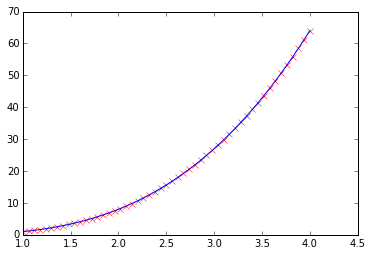

In [14]:
xs, tys = trapezoid(x0,xf,f0,N,fp,fpy)
plt.plot(xs,tys,'rx',xs,f(xs))

*** RUNGE KUTTA ***

**Runge-Kutta 2nd Order**

In [15]:
def rk2(x0,xf,f0,N,fp):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    for i in range(N):
        s1 = fp(x0,f0)
        x0 += delta
        s2 = fp(x0,f0 + delta*s1)
        f0 += delta*(s1 + s2)/2
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

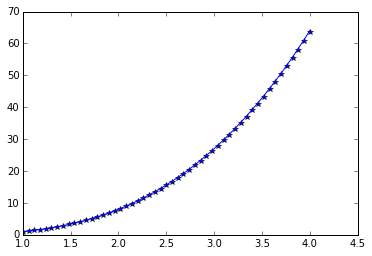

In [16]:
xs, rk2ys = rk2(x0,xf,f0,N,fp)
plt.plot(xs,rk2ys,'b*',xs,f(xs))

**Runge-Kutta 4th Order**

In [17]:
def rk4(x0,xf,f0,N,fp):
    xs = [x0]
    ys = [f0]
    delta = (xf - x0)/float(N)
    hd = delta/2
    for i in range(N):
        s1 = fp(x0,f0)
        s2 = fp(x0 + hd,f0 + hd*s1)
        s3 = fp(x0 + hd,f0 + hd*s2)
        x0 += delta
        s4 = fp(x0,f0 + delta*s3)        
        f0 += delta*(s1 + 2*s2 + 2*s3 + s4)/6
        xs = np.append(xs,x0)
        ys = np.append(ys,f0)
    return xs, ys

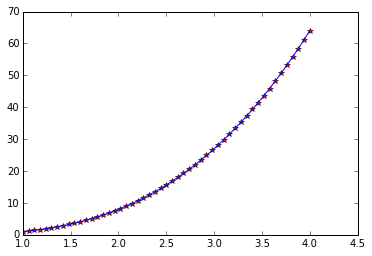

In [18]:
xs, rk4ys = rk4(x0,xf,f0,N,fp)
plt.plot(xs,rk4ys,'r*',xs,f(xs))

** All Together **

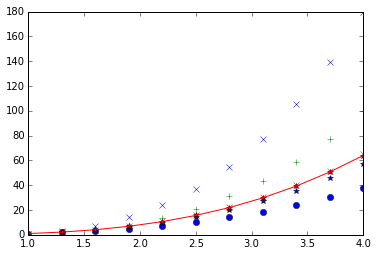

In [19]:
N=10
xs, eys = forward_euler(x0,xf,f0,N,fp)
xs,mys = midpoint(x0,xf,f0,N,fp)
mys  = mys[:-1]
xs, beys = backward_euler(x0,xf,f0,N,fp,fpy)
xs, tys = trapezoid(x0,xf,f0,N,fp,fpy)
xs, rk2ys = rk2(x0,xf,f0,N,fp)
xs, rk4ys = rk4(x0,xf,f0,N,fp)
plt.plot(xs,eys,'o',xs,beys,'bx',xs,tys,'rx',xs,mys,'+',xs,rk2ys,'b*',xs,rk4ys,'r*',xs,f(xs))

In [20]:
def error_calc(num,N):
    if num == 1:
        return (np.absolute(f(xf) - forward_euler(x0,xf,f0,N,fp)[1][-1]))
    if num == 2:
        return (np.absolute(f(xf) - midpoint(x0,xf,f0,N,fp)[1][-2]))
    if num == 3:
        return (np.absolute(f(xf) - backward_euler(x0,xf,f0,N,fp,fpy)[1][-1]))    
    if num == 4:
        return (np.absolute(f(xf) - trapezoid(x0,xf,f0,N,fp,fpy)[1][-1]))
    if num == 5:
        return (np.absolute(f(xf) - rk2(x0,xf,f0,N,fp)[1][-1]))
    if num == 6:
        return (np.absolute(f(xf) - rk4(x0,xf,f0,N,fp)[1][-1]))    

In [21]:
Ns=np.array([int(10**(i/5.)) for i in range(10,20)])
feul_errors = [error_calc(1,i) for i in Ns]
mid_errors = [error_calc(2,i) for i in Ns]
beul_errors = [error_calc(3,i) for i in Ns]
trap_errors = [error_calc(4,i) for i in Ns]
rk2_errors = [error_calc(5,i) for i in Ns]
rk4_errors = [error_calc(6,i) for i in Ns]

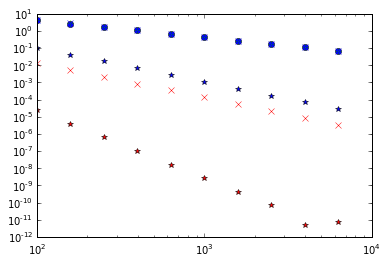

In [22]:
plt.loglog(Ns,feul_errors,'bo',Ns,mid_errors,'g+',Ns,beul_errors,'bx',Ns,trap_errors,'rx',Ns,rk2_errors,'b*',Ns,rk4_errors,'r*')

In [ ]:
test4 = 10**2.06*np.array(map(lambda x: x**(-4),Ns))
test2 = 10**2.4*np.array(map(lambda x: x**(-2),Ns))
test11 = 10**2.3*np.array(map(lambda x: x**(-1),Ns))
test12 = 10**1.8*np.array(map(lambda x: x**(-1),Ns))
plt.loglog(Ns,feul_errors,'bo',Ns,mid_errors,'g+',Ns,beul_errors,'bx',Ns,trap_errors,'rx',Ns,rk2_errors,'b*',Ns,rk4_errors,'r*',Ns,test11,'b',Ns,test12,'b',Ns,test2,'r',Ns,test4,'g')